In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('query2_nouns.csv')

In [3]:
df.head()

,Unnamed: 0,created,tweet,tweet_id,hashtags,user_id,username,location,num_followers,geo_enabled,long,lat
0,0,2021-11-01 21:32:37+00:00,"@LesserIsMorer @beard_sports @walsha So, it's ...",1455286680416661505,[],256780748,yodapthd007,"Huntington Beach, CA",59,False,NaN,NaN
1,1,2021-11-01 21:16:17+00:00,look at this big ass coyote Rosie &amp; I saw ...,1455282570246049797,[],319697546,shutupsilver,Los Feliz,377,True,NaN,NaN
2,2,2021-11-01 19:28:36+00:00,There was a coyote in my backyard this morning...,1455255472013864960,[],1388063802,cillaaboo,NaN,239,True,NaN,NaN
3,3,2021-11-01 19:25:00+00:00,"@savg_coyote @GACPodcast17 That ain't sarcasm,...",1455254566363041793,[],1132445563465551872,KunoKeebs,"Los Angeles, CA",158,False,NaN,NaN
4,4,2021-11-01 19:16:07+00:00,@ibookery @drkiki @padresj Right! Someone else...,1455252332027858948,[],771851136655589377,NeilLowenthal1,"Los Angeles, CA",18196,False,NaN,NaN


Ill want to drop the first column

In [4]:
first_column = df.columns.values[0]

In [5]:
df = df.drop(columns=first_column)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   created        306 non-null    object 
 1   tweet          306 non-null    object 
 2   tweet_id       306 non-null    int64  
 3   hashtags       306 non-null    object 
 4   user_id        306 non-null    int64  
 5   username       306 non-null    object 
 6   location       300 non-null    object 
 7   num_followers  306 non-null    int64  
 8   geo_enabled    306 non-null    bool   
 9   long           1 non-null      float64
 10  lat            1 non-null      float64
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 24.3+ KB


I'll want to convert the `created` column to date time and probably drop the lat and long columns because they have little data

In [7]:
df = df.drop(columns=['lat', 'long']).copy()

In [8]:
df['created'] = df['created'].astype('datetime64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   created        306 non-null    datetime64[ns]
 1   tweet          306 non-null    object        
 2   tweet_id       306 non-null    int64         
 3   hashtags       306 non-null    object        
 4   user_id        306 non-null    int64         
 5   username       306 non-null    object        
 6   location       300 non-null    object        
 7   num_followers  306 non-null    int64         
 8   geo_enabled    306 non-null    bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(4)
memory usage: 19.5+ KB


In [10]:
df.head()

,created,tweet,tweet_id,hashtags,user_id,username,location,num_followers,geo_enabled
0,2021-11-01 21:32:37,"@LesserIsMorer @beard_sports @walsha So, it's ...",1455286680416661505,[],256780748,yodapthd007,"Huntington Beach, CA",59,False
1,2021-11-01 21:16:17,look at this big ass coyote Rosie &amp; I saw ...,1455282570246049797,[],319697546,shutupsilver,Los Feliz,377,True
2,2021-11-01 19:28:36,There was a coyote in my backyard this morning...,1455255472013864960,[],1388063802,cillaaboo,NaN,239,True
3,2021-11-01 19:25:00,"@savg_coyote @GACPodcast17 That ain't sarcasm,...",1455254566363041793,[],1132445563465551872,KunoKeebs,"Los Angeles, CA",158,False
4,2021-11-01 19:16:07,@ibookery @drkiki @padresj Right! Someone else...,1455252332027858948,[],771851136655589377,NeilLowenthal1,"Los Angeles, CA",18196,False


In [11]:
df['date'] = pd.to_datetime(df['created'], format='%Y-%m-%d')

In [12]:
df.head()

,created,tweet,tweet_id,hashtags,user_id,username,location,num_followers,geo_enabled,date
0,2021-11-01 21:32:37,"@LesserIsMorer @beard_sports @walsha So, it's ...",1455286680416661505,[],256780748,yodapthd007,"Huntington Beach, CA",59,False,2021-11-01 21:32:37
1,2021-11-01 21:16:17,look at this big ass coyote Rosie &amp; I saw ...,1455282570246049797,[],319697546,shutupsilver,Los Feliz,377,True,2021-11-01 21:16:17
2,2021-11-01 19:28:36,There was a coyote in my backyard this morning...,1455255472013864960,[],1388063802,cillaaboo,NaN,239,True,2021-11-01 19:28:36
3,2021-11-01 19:25:00,"@savg_coyote @GACPodcast17 That ain't sarcasm,...",1455254566363041793,[],1132445563465551872,KunoKeebs,"Los Angeles, CA",158,False,2021-11-01 19:25:00
4,2021-11-01 19:16:07,@ibookery @drkiki @padresj Right! Someone else...,1455252332027858948,[],771851136655589377,NeilLowenthal1,"Los Angeles, CA",18196,False,2021-11-01 19:16:07


In [13]:
df.drop(columns='date', inplace=True)

In [14]:
df['date'] = df['created'].dt.date
df['time'] = df['created'].dt.time
df['hour'] = df['created'].dt.hour

In [15]:
df.head()

,created,tweet,tweet_id,hashtags,user_id,username,location,num_followers,geo_enabled,date,time,hour
0,2021-11-01 21:32:37,"@LesserIsMorer @beard_sports @walsha So, it's ...",1455286680416661505,[],256780748,yodapthd007,"Huntington Beach, CA",59,False,2021-11-01,21:32:37,21
1,2021-11-01 21:16:17,look at this big ass coyote Rosie &amp; I saw ...,1455282570246049797,[],319697546,shutupsilver,Los Feliz,377,True,2021-11-01,21:16:17,21
2,2021-11-01 19:28:36,There was a coyote in my backyard this morning...,1455255472013864960,[],1388063802,cillaaboo,NaN,239,True,2021-11-01,19:28:36,19
3,2021-11-01 19:25:00,"@savg_coyote @GACPodcast17 That ain't sarcasm,...",1455254566363041793,[],1132445563465551872,KunoKeebs,"Los Angeles, CA",158,False,2021-11-01,19:25:00,19
4,2021-11-01 19:16:07,@ibookery @drkiki @padresj Right! Someone else...,1455252332027858948,[],771851136655589377,NeilLowenthal1,"Los Angeles, CA",18196,False,2021-11-01,19:16:07,19


In [16]:
# Split dataframe into morning, afternoon, evening, and night by when tweet was created
df_morning = df[(df['hour'] >= 6) & (df['hour'] < 12)].copy()
df_afternoon = df[(df['hour'] >= 12) & (df['hour'] < 18)].copy()
df_evening = df[(df['hour'] >= 18) & (df['hour'] < 24)].copy()
df_night = df[(df['hour'] >= 0) & (df['hour'] < 6)].copy()

In [17]:
count_by_time_of_day = [df_morning.shape[0], df_afternoon.shape[0], df_evening.shape[0], df_night.shape[0]]

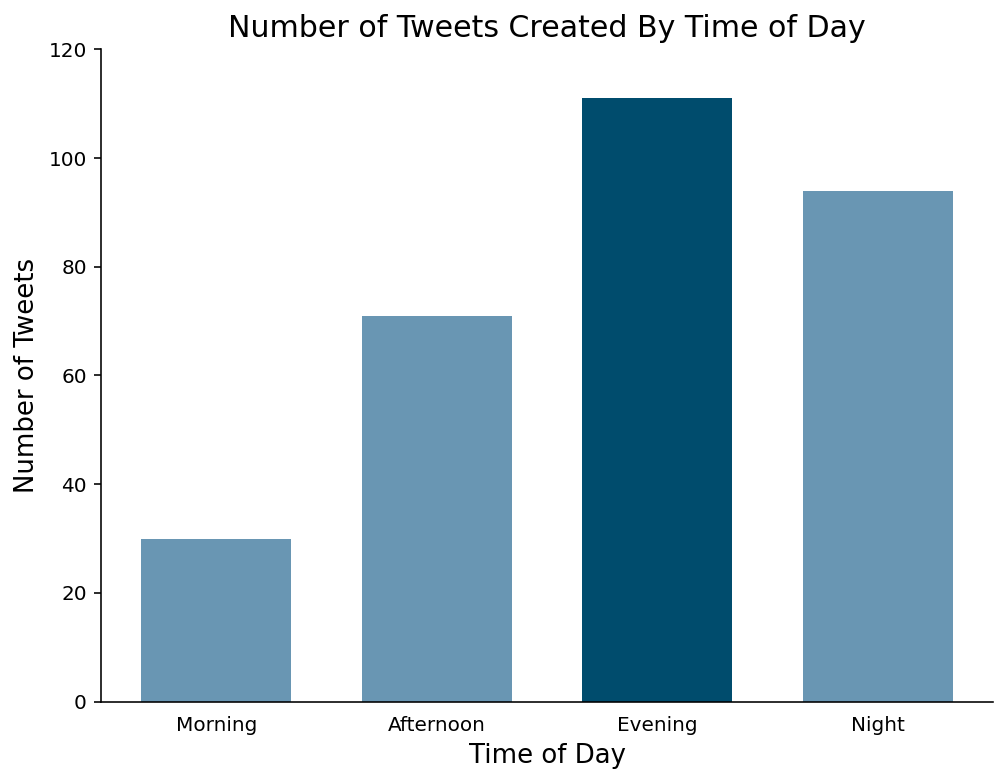

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
default_color = '#6996b3'
highlight_color = '#004c6d'
ax.bar(x=['Morning', 'Afternoon', 'Evening', 'Night'], 
       height=count_by_time_of_day, 
       width=.68,
       color=[default_color, default_color, highlight_color, default_color]
      )
ax.set_xlabel('Time of Day', size=13)
ax.set_ylabel('Number of Tweets', size=13)
ax.set_yticks(np.arange(0, 140, 20))
ax.set_title('Number of Tweets Created By Time of Day', size=15)
ax.tick_params(axis='x', bottom=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Create TFIDF functions

In [19]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
sp = spacy.load('en_core_web_sm')

In [20]:
def get_words_spacy(text, nouns=False, verbs=False):
    stopwords = sp.Defaults.stop_words
    words = text.split()
    words = [w for w in words if not w.startswith('@') and not w.startswith('http')]  # remove users mentioned and links
    text = ' '.join(words)
    words = sp(text)
    if nouns and verbs:
        words = [w for w in words if w.pos_ == 'NOUN' or w.pos_ == 'VERB']
    if nouns and not verbs:
        words = [w for w in words if w.pos_ == 'NOUN']
    if not nouns and verbs:
        words = [w for w in words if w.pos_ == 'VERB']
    words = [w for w in words if w.is_alpha is True]
    words = [w.text.lower() for w in words if w.text.lower() not in stopwords]
    words = [w for w in words if w not in ['gt', 'amp']]  # gt and amp are encoding characters
    words = [w for w in words if len(w) > 2]  # ignore a, an, to, at, be, ...
    return words

In [21]:
tweets = list(df['tweet'])
tfidf = TfidfVectorizer(
    input='content',
    analyzer='word',
    tokenizer=get_words_spacy,
    stop_words='english',
    decode_error='ignore'
)
tfidf_token = tfidf.fit(tweets)

/Users/Isaacbolo/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [22]:
def summarize(tfidf, text, n):
    """
    Given a trained TfidfVectorizer object and some XML text, return
    up to n (word,score) pairs in a list. Discard any terms with
    scores < 0.09.
    """
    word_matrix = tfidf.transform([text])  # text might need to be a list
    row_word = word_matrix.nonzero()
    scores = [(tfidf.get_feature_names()[col], word_matrix[0,col]) for col in row_word[1]]# if word_matrix[0,col]>=0.09]
    scores = sorted(scores, key=lambda x: x[1], reverse=True)[:n]
    top_n_words = [(word, round(score, 3)) for word, score in scores]
    # scores_series = pd.Series(data=[score for _word, score in scores], index=[word for word, _score in scores])
    # scores_series = scores_series.nlargest(n)
    # scores_series = scores_series.round(3)
    # top_n_words = [(word, score) for word, score in scores_series.items()]

    return top_n_words

## TFIDF Morning Tweets

In [23]:
morning_scores = [summarize(tfidf_token, tweet, 2) for tweet in df_morning['tweet']]
morning_scores

[[('barking', 0.571), ('visiting', 0.306)],
 [('worry', 0.287), ('drink', 0.287)],
 [('cat', 0.408), ('spunky', 0.281)],
 [('sure', 0.562), ('howling', 0.497)],
 [('hitting', 0.489), ('bruh', 0.489)],
 [('filming', 0.626), ('howling', 0.554)],
 [('pizza', 0.477), ('fight', 0.477)],
 [('wtf', 0.478), ('glendora', 0.478)],
 [('raised', 0.69), ('price', 0.69)],
 [('spot', 0.741), ('maybe', 0.628)],
 [],
 [('squirrel', 0.449), ('neat', 0.449)],
 [('unscathed', 0.343), ('tackle', 0.343)],
 [('kitty', 0.524), ('hall', 0.524)],
 [('gosh', 0.673), ('look', 0.551)],
 [('roaming', 0.952), ('coyotes', 0.305)],
 [('hopefully', 0.712), ('tomorrow', 0.664)],
 [('survives', 0.336), ('scream', 0.336)],
 [('traveling', 0.514), ('interesting', 0.514)],
 [('thankfully', 0.284), ('sliding', 0.284)],
 [('door', 0.614), ('wondering', 0.307)],
 [('teeth', 0.443), ('sleep', 0.443)],
 [('winner', 0.315), ('weekly', 0.315)],
 [('starring', 0.478), ('airing', 0.478)],
 [('swallow', 1.0)],
 [('brooo', 0.712), ('f

In [24]:
morning_tweets_combined = ' '.join([tweet for tweet in df_morning['tweet']])
morning_tweets_combined

'Visiting dog (the coyote one) started barking at 4 A.M. so I got up and let him out long with the other dogs. They didn\'t go out &amp; start barking, thank goodness. But when I\'m up, I\'m up 2/ We know that a Bobcat and Coyotes have been around the house because we’ve seen them on the outside cameras. One even came by to drink water at 12:45 p.m. in the afternoon a couple of days ago. \nWe always had that worry that she was vulnerable. A Phoenix couple caught their cat chasing away a coyote from their home early in the morning and it was all captured on their security camera. "Lucky, spunky cat."  https://t.co/9CgTd7O8rG pretty sure i hear a coyote howling. 😳 bruh i was this close 🤏🏻 to hitting a coyote on my drive home just now Filming outside and the coyotes are howling and what not. I would fist fight a pack of coyotes for a pizza right now My ass almost hit a coyote driving in Glendora wtf 😂 @DissidentSoaps @ProdigalParable This just raised the price of coyotes. @Dheepa97 Ok may

In [25]:
combined_morning_score = summarize(tfidf_token, morning_tweets_combined, 12)
combined_morning_score

[('coyote', 0.27),
 ('coyotes', 0.254),
 ('got', 0.186),
 ('home', 0.176),
 ('video', 0.145),
 ('furality', 0.132),
 ('door', 0.132),
 ('barking', 0.123),
 ('howling', 0.117),
 ('fist', 0.117),
 ('little', 0.112),
 ('couple', 0.112)]

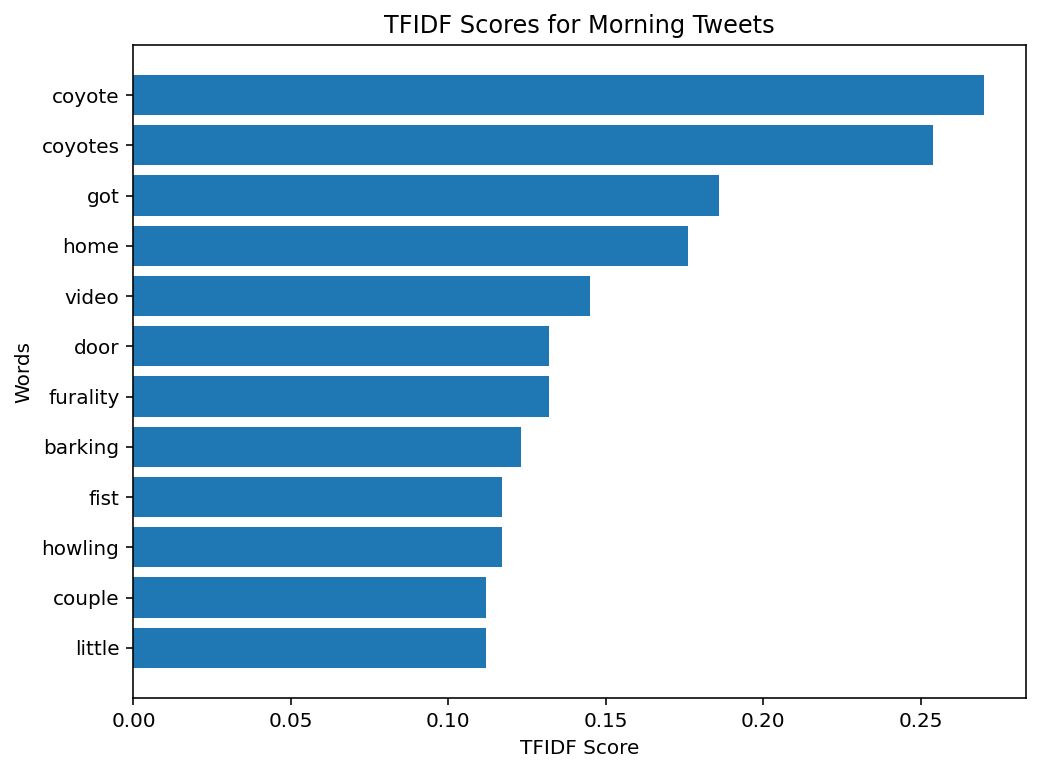

In [26]:
# plot scores
combined_morning_score_sorted = sorted(combined_morning_score, key=lambda x: x[1])
y = [word for word, score in combined_morning_score_sorted]
x = [score for word, score in combined_morning_score_sorted]

fig, ax = plt.subplots(figsize=(8,6))
ax.barh(y, x)
ax.set_title('TFIDF Scores for Morning Tweets')
ax.set_ylabel('Words')
ax.set_xlabel('TFIDF Score')

plt.show()

In [27]:
def plot_tfidf(df_, tfidf, n, time):
    tweets_combined = ' '.join([tweet for tweet in df_['tweet']])
    combined_score = summarize(tfidf, tweets_combined, n)
    combined_score_sorted = sorted(combined_score, key=lambda x: x[1])
    y = [word for word, score in combined_score_sorted]
    x = [score for word, score in combined_score_sorted]

    fig, ax = plt.subplots(figsize=(8,6))
    ax.barh(y, x)
    ax.set_title(f'TFIDF Scores for {time} Tweets')
    ax.set_ylabel('Words')
    ax.set_xlabel('TFIDF Score')

    plt.show()

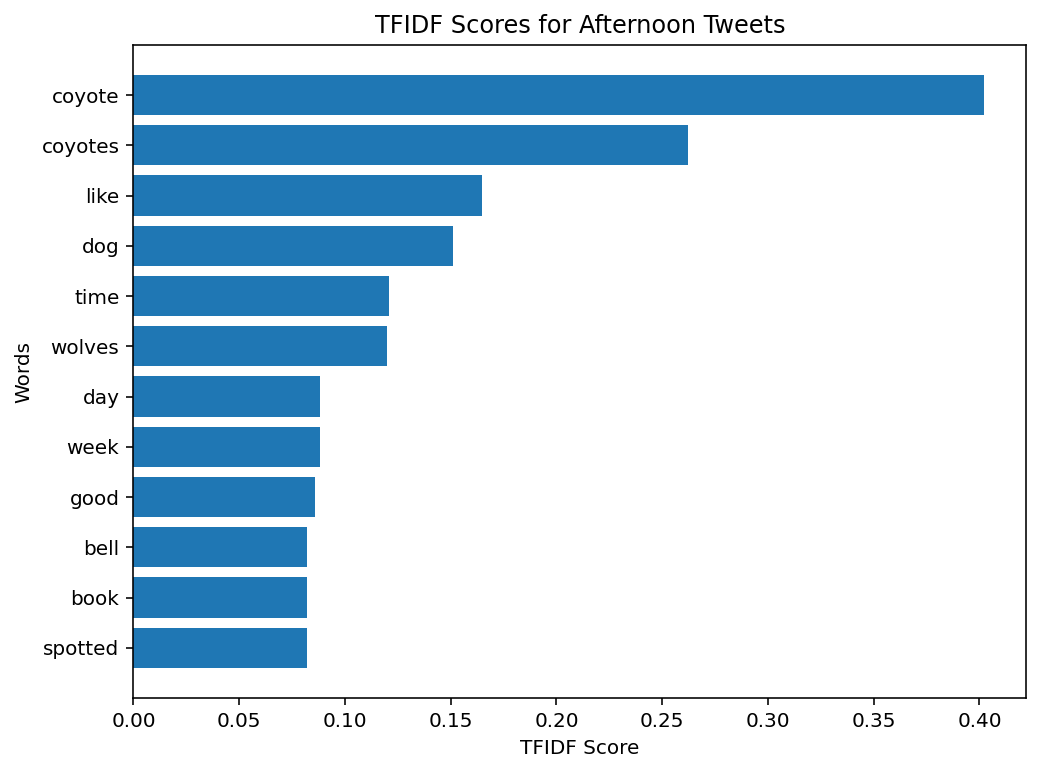

In [28]:
# afternoon tfidf plot
plot_tfidf(df_afternoon, tfidf_token, 12, 'Afternoon')

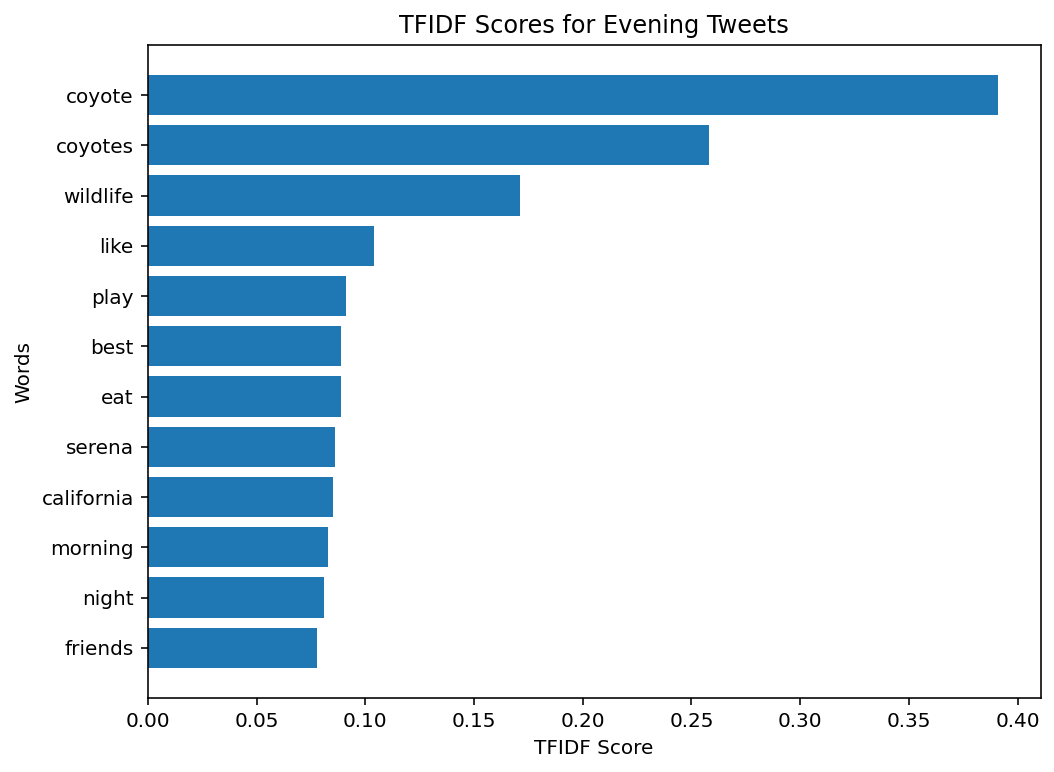

In [29]:
# plot evening
plot_tfidf(df_evening, tfidf_token, 12, 'Evening')

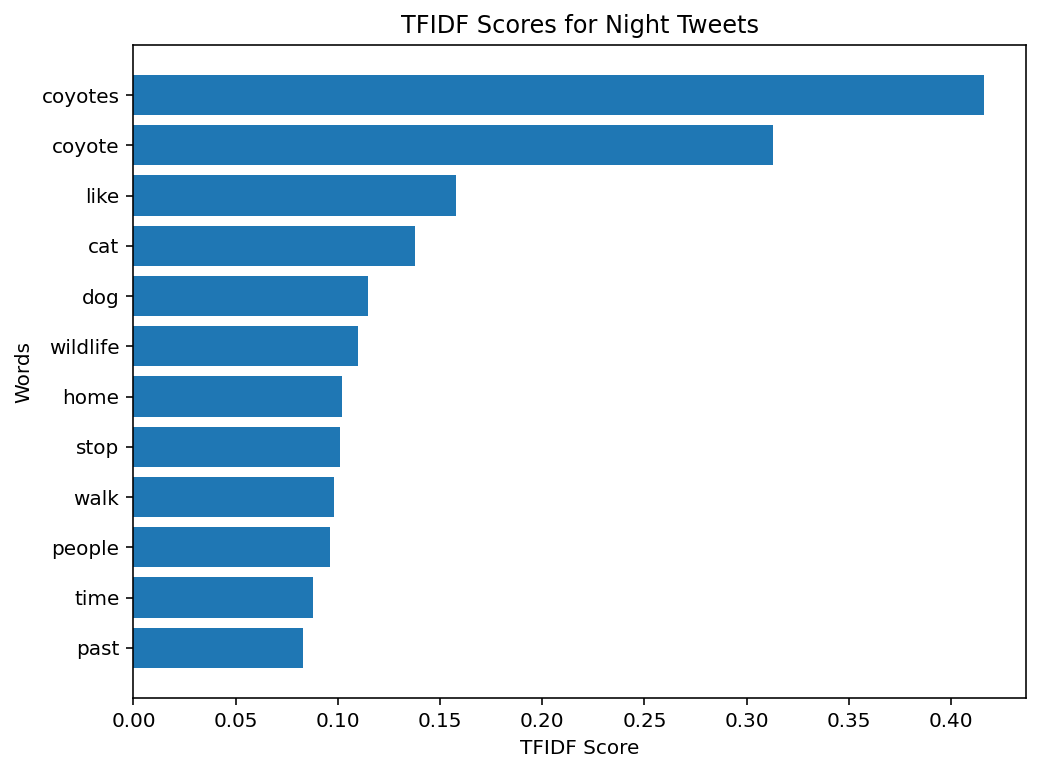

In [30]:
# plot night
plot_tfidf(df_night, tfidf_token, 12, 'Night')